# PyTorch Computer Vision

* https://www.learnpytorch.io/03_pytorch_computer_vision/

<img src="ComputerVision - 1.png">

## 0. Computer vision libraries in PyTorch


* [`torchvision`](https://pytorch.org/vision/stable/index.html) - base domin library for PyTorch
* `torchvision.datasets` -  get datasets and data loading functions for computer vision here
* `torchvision.models` - ge pretrained computer vision models that you can leverage for your problem
* `torchvision.transforms` - functions for manipulating your vision data(images) to be suitable for use with an ML model.
* `torch.utils.data.Dataset` -  Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [4]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

1.13.1
0.14.1


## 1. Getting a dataset

Dataset we will be using:- FashionMNIST from `torchvision.datasets`

In [5]:
# Setup training data

train_data = datasets.FashionMNIST(root="data",      # where to download data
                                   train=True,       # do we want trianing set
                                   download=True,    # do we wanna download
                                   transform=torchvision.transforms.ToTensor(),  #how do we want to transform data?
                                   target_transform=None   # how do we want to transform the label/target?
)

test_data = datasets.FashionMNIST(root="data",
                                 train=False,
                                 download=True,
                                 transform=ToTensor(),
                                 target_transform=None
)

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# See the first training example
image, label = train_data[0]
image[:,:,1], label             # ToTensor() converted entire PIL in tensor

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0000, 0.2235,
          0.7922, 0.9137, 0.8000, 0.7961, 0.4784, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000]]),
 9)

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input and output shapes of data

In [11]:
# Check the shape of our image

print(f"Print image shape:{image.shape} -> [Color Channel, height, width]")
print(f"Image Label: {class_names[label]}")

Print image shape:torch.Size([1, 28, 28]) -> [Color Channel, height, width]
Image Label: Ankle boot


### 1.2 Visualize our data

Image Shape:torch.Size([1, 28, 28])


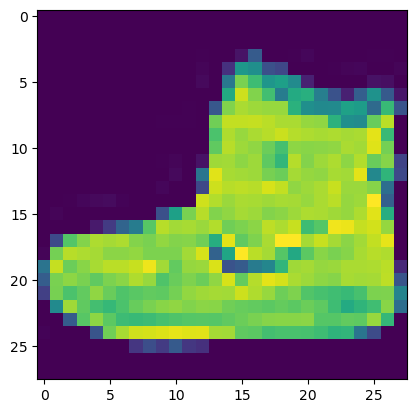

In [12]:
image, label = train_data[0]
print(f"Image Shape:{image.shape}")

plt.imshow(image.squeeze())   # Used squeeze becoz color channel had to be in last in matplotlib 
                              # so we get rid of it

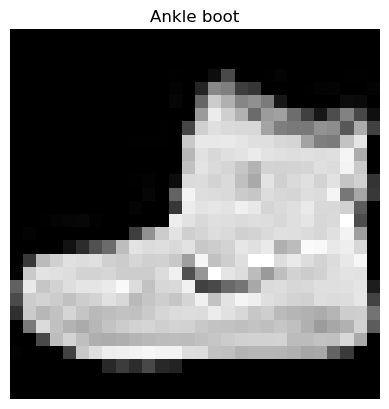

In [13]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

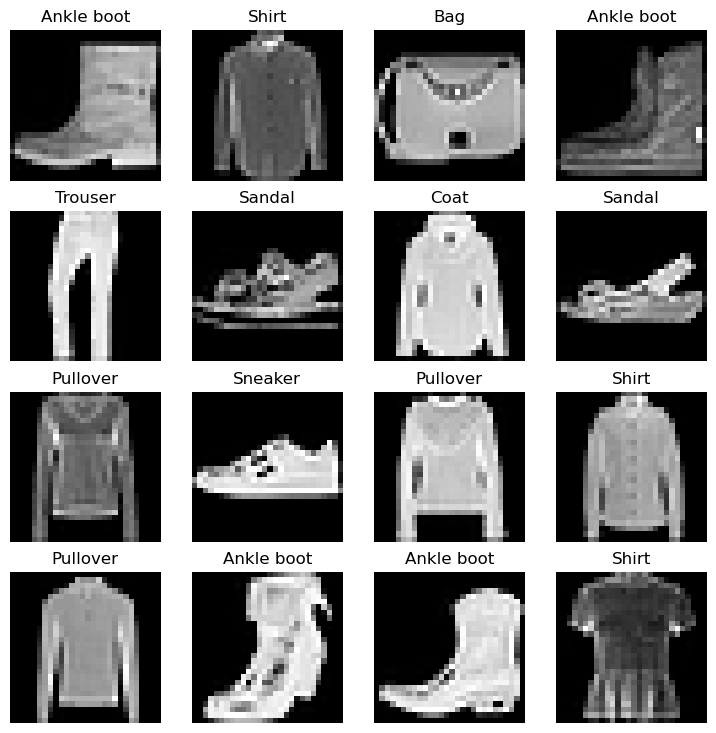

In [14]:
# Plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item() # Getting single random number
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch datasets.

DataLoader turns our dataset into python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient , as in, your computing hardware may not be able to look (store in memory) thousands or millions of images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradient per epoch.

In [15]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterable (batches)
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1ebc5ce5940>,
 <torch.utils.data.dataloader.DataLoader at 0x1ebc5ce5c10>)

In [16]:
# Let's check out what we have created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} bathes of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001EBC5CE5940>, <torch.utils.data.dataloader.DataLoader object at 0x000001EBC5CE5C10>)
Length of train_dataloader: 1875 bathes of 32...
Length of test_dataloader: 313 batches of 32...


In [17]:
# Check out what's inside the trianing dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


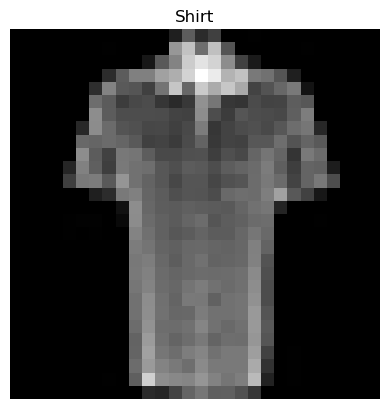

In [18]:
# Show a sample 
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it;s best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

Start Simply -> Add complexity

In [19]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x =  train_features_batch[0]

# Flatten the sample
output = flatten_model(x)  # Perform forward pass

# Print out what happened
print(f"Shape before flattenting: {x.shape} -> [color channel, height, width]")
print(f"Shape after flattening: {output.shape} -> [cc, height*width]" ) 

Shape before flattenting: torch.Size([1, 28, 28]) -> [color channel, height, width]
Shape after flattening: torch.Size([1, 784]) -> [cc, height*width]


In [20]:
from torch import nn
class FashionMNISTV0(nn.Module):
    def __init__(self, input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                     out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [21]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTV0(input_shape=28*28,
                        hidden_units=10,   # How many units in hidden layer
                        output_shape=len(class_names)   # One for every class
                        ).to("cpu")     

model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand([1,1,  28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss Function - since we are working with multi-class, `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()`
* Evaluation metric -  since we are working on a classification problem, lets use accuracy aqs our evaluation metrics.

In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn


# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [24]:
from timeit import default_timer as timer

def print_train_time(start:float,
                    end:float,
                    device:torch.device=None):
    """
    Prints difference between start and end time
    """
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [25]:
start_time = timer()
# some code...
end_time=timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


1.0900000006586197e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform training steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all.

In [26]:
# Import tqdm for profress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs(we'll keep this small for faster training time)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    ### Training
    train_loss = 0
    
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_preds = model_0(X)
        
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_preds, y)
        train_loss += loss   # accumulate train loss
        
        # 3. Optimizer zero gra
        optimizer.zero_grad()
        
        # Loss backward
        loss.backward()
        
        # 5. optimizer step
        optimizer.step()
        
        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")
            
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    
    ### Testing 
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)
            
            # Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
            
            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test,
                                   y_pred=test_pred.argmax(dim=1))
            
        # Calculate testt loss average per batch
        test_loss /= len(test_dataloader)
        
        # Calcualte the acc aveage per batch
        test_acc /= len(test_dataloader)
        
    # Print out whats happening
    print(f"\nTrain Loss: {train_loss:.4f} |Test Loss: {test_loss:.4f} , Test Acc: {test_acc:.4f}%")
    
# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train Loss: 0.5904 |Test Loss: 0.5095 , Test Acc: 82.0387%
Epoch: 1
-----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train Loss: 0.4763 |Test Loss: 0.4799 , Test Acc: 83.1969%
Epoch: 2
-----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train Loss: 0.4550 |Test Loss: 0.4766 , Test Acc: 83.4265%
Train time on cpu: 8.379 seconds


## 4. Make predictions and get model_0 results

In [27]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module,
             accuracy_fn):
    """
    Returns a dictionary contraining the results of model predicting 
    on data_loader
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
                       
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, #only works if model created with class
           "model_loss": loss.item(),
           "model_acc": acc}

# Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in 3rd Notebook

In [29]:
# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flatten into single vector
            nn.Linear(in_features=input_shape,
                     out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                     out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)
    


In [30]:
# Instantiating model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,  #flatten layer output
                             hidden_units=10,
                             output_shape=len(train_data.classes)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Loss function and optimizer and evaluation metrics

In [31]:
loss_fn = nn.CrossEntropyLoss()   # how wrong our model is    
optimizer = torch.optim.SGD(params=model_1.parameters(),  # Tries to reduce loss
                           lr=0.1)


### 6.2 Functionizing training and evaluation/testing loops

Lets create a functions for :
* Training loop - `train_step()`
* testing loop - `test_step()`

In [32]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
    """
    Performs a training with model trying to learn on data_loader.
    """
    train_loss, train_acc = 0, 0
    
    # Put model into training mode
    model.train()

    #Add a loop to loop through trianing batches
    train_loss = 0 
    for batch, (X, y) in enumerate(data_loader):   # batch = batch number, X=feature within a batch, y=label
        
        # Put data on target device
        X, y = X.to(device), y.to(device)
        
        # 1. forward pass (outputs the raw logits from model)
        y_pred = model(X)

        # 2. Calculate the loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1))  # logits -> pred labels
        

        # 3. OPtimizer zero grad
        optimizer.zero_grad()

        # 4. Loss Backward
        loss.backward()

        # 5. optimizer step (update model's parameters)
        optimizer.step()

        
    # Divide total train loss and accuracy by length of data_loader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")

In [33]:
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device=device):
    """
    Performs a testing with model trying to learn on data_loader.
    """
    test_loss, test_acc = 0, 0
    
    # Put model into evaluation mode
    model.eval()
    
    # Turn on inference mode context manager
    with torch.inference_mode():
        # add a loop to loop through test batch
        for X, y in data_loader:
            # put data on target device 
            X, y = X.to(device), y.to(device)
            
            # 1. forward pass  (outputs raw logits)
            test_pred = model(X)
            
            # 2. Calculate the loss, accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,     # logits -> pred labels
                                   y_pred=test_pred.argmax(dim=1))
            
        # Calculate test loss average
        test_loss /= len(data_loader)
        
        # calculate test acc average
        test_acc /= len(data_loader)
        
        # Print out what's ahppening
        print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%\n")
            

In [34]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step and test_step

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n=====")
    train_step(model=model_1, 
               data_loader=train_dataloader, 
               loss_fn=loss_fn, 
               optimizer=optimizer, 
               accuracy_fn=accuracy_fn)
    
    test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn)
    
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
=====
Train Loss: 1.09199 | Train Acc: 61.34%
Test Loss: 0.95636 | Test Acc: 65.00%

Epoch: 1
=====
Train Loss: 0.78101 | Train Acc: 71.93%
Test Loss: 0.72227 | Test Acc: 73.91%

Epoch: 2
=====
Train Loss: 0.67027 | Train Acc: 75.94%
Test Loss: 0.68500 | Test Acc: 75.02%

Train time on cuda: 11.060 seconds


> **Note** : Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
> 
> Why is this?
> 
> 1. It could be that overhead for copying data/model to and from the GPU outweights the compute benefits offereed by GPU.
> 2. The hardware your are using has better CPU in terms of compatibility than GPU.

In [35]:
# Train time on CPU  (linearity)
total_train_time_model_0

8.378620599999977

In [36]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module,
             accuracy_fn,
              device=device):
    """
    Returns a dictionary contraining the results of model predicting 
    on data_loader
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # make our data device agnostic
            X, y = X.to(device), y.to(device)
            
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, #only works if model created with class
           "model_loss": loss.item(),
           "model_acc": acc}



In [37]:
# Get mode_1 results dictionary
model_1_results = eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                            device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network (CNN)

Known for their capabilities to find patterns in visual data.

Input Data >> CNN >> Compressed Representation of Data >> Prediction

In [38]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG model.
    """
    def __init__(self, input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        # FEATURE EXTRACTION LAYERS
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,    # 2d becoz of 2Dimensional data
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),   # Setting hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=1,
                     stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        # CLASSIFICATION LAYERS
        self.classifier= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,   # It's a trick
                     out_features=output_shape)
        )
        
    def forward(self, x):
        x = self.conv_block_1(x)
#         print(f"Output shape of Conv_Block_1:{x.shape}")
        x = self.conv_block_2(x)
#         print(f"Output shape of Conv_Block_1:{x.shape}")
        x = self.classifier(x)
#         print(f"Output shape of Classifier:{x.shape}")
        return x

In [39]:
# Instantiating model
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,   # [color channel = 1] becoz of grayscale
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

In [40]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [41]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

See the documentation for `nn.Conv2d` - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [42]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test Image: \n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test Image: 
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [43]:
torch.manual_seed(42)

# Create a single conv2d layer

conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1)

# Pass the data through convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

Read more here - https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html?highlight=maxpool2d#torch.nn.MaxPool2d

In [44]:
test_image.shape

torch.Size([3, 64, 64])

In [45]:
# Print out original image shape without squeeze dimension
print(f"Test IMage original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv and max pool layer: {test_image_through_conv_and_max_pool.shape}")

Test IMage original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv and max pool layer: torch.Size([1, 10, 32, 32])


In [46]:
torch.manual_seed(42)

# Create a random tensor with similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2,2))
print(f"Randomg tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Cretea amax pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor to max pool
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max pool tensor: {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Randomg tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor: tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [47]:
# Setup loss function/eval metrics/optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)

### 7.4 Training and Testing `model_2` using training and testing functions

In [48]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Number of epochs 
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(model=model_2, 
               data_loader=train_dataloader, 
               loss_fn=loss_fn, 
               optimizer=optimizer, 
               accuracy_fn=accuracy_fn,
              device=device)
    
    test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train Loss: 0.58691 | Train Acc: 78.61%
Test Loss: 0.39783 | Test Acc: 85.91%

Epoch: 1
------
Train Loss: 0.36264 | Train Acc: 86.97%
Test Loss: 0.34807 | Test Acc: 87.00%

Epoch: 2
------
Train Loss: 0.32393 | Train Acc: 88.27%
Test Loss: 0.33727 | Test Acc: 88.03%

Train time on cuda: 14.410 seconds


In [49]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.337265282869339,
 'model_acc': 88.02915335463258}

In [50]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [51]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## 8. Compare model results and training time

In [52]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, 
                                model_1_results, 
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.337265,88.029153


In [53]:
# Add training time to the results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTV0,0.476639,83.426518,8.378621
1,FashionMNISTModelV1,0.685001,75.019968,11.059924
2,FashionMNISTModelV2,0.337265,88.029153,14.409934


Text(0, 0.5, 'model')

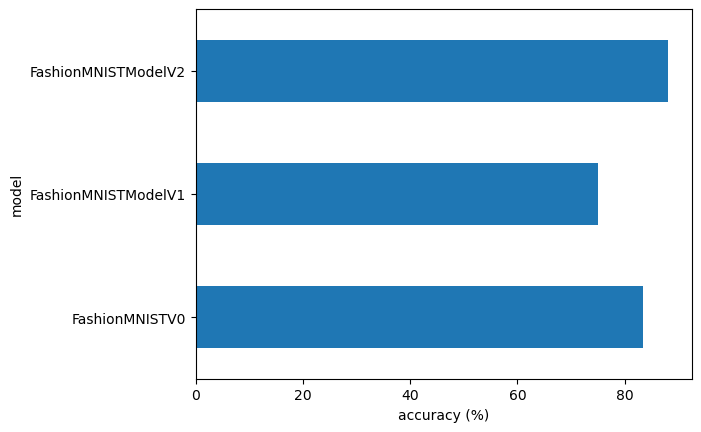

In [54]:
# Visualize our model results

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [55]:
def make_predictions(model: nn.Module,
                    data: list,
                    device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            # Forward Pass (model outputs raw logits)
            pred_logits = model(sample)
            
            # Getitng pred prob
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
            
            # Getting pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [56]:
import random
# random.seed(42)
test_sample = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):  # chose 9 for 9 samples for visual grid
    test_sample.append(sample)
    test_labels.append(label)
    
# View the first sample shape
test_sample[0].shape, test_labels[0]

(torch.Size([1, 28, 28]), 4)

Text(0.5, 1.0, 'Coat')

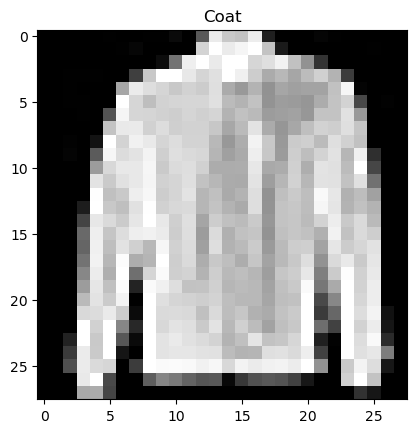

In [57]:
plt.imshow(test_sample[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [58]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                             data=test_sample)

# View first two prediction probabilties
pred_probs[:2]

tensor([[6.6515e-03, 2.4162e-05, 6.6565e-02, 4.9007e-05, 7.5122e-01, 8.4491e-06,
         1.7521e-01, 8.3396e-06, 1.8405e-04, 7.6768e-05],
        [9.4494e-01, 3.9833e-06, 2.1580e-04, 1.4179e-02, 5.0362e-05, 2.2193e-06,
         4.0189e-02, 1.0083e-06, 4.2249e-04, 2.6686e-07]])

In [59]:
# Convert pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 0, 4, 9, 3, 4, 8, 1, 8])

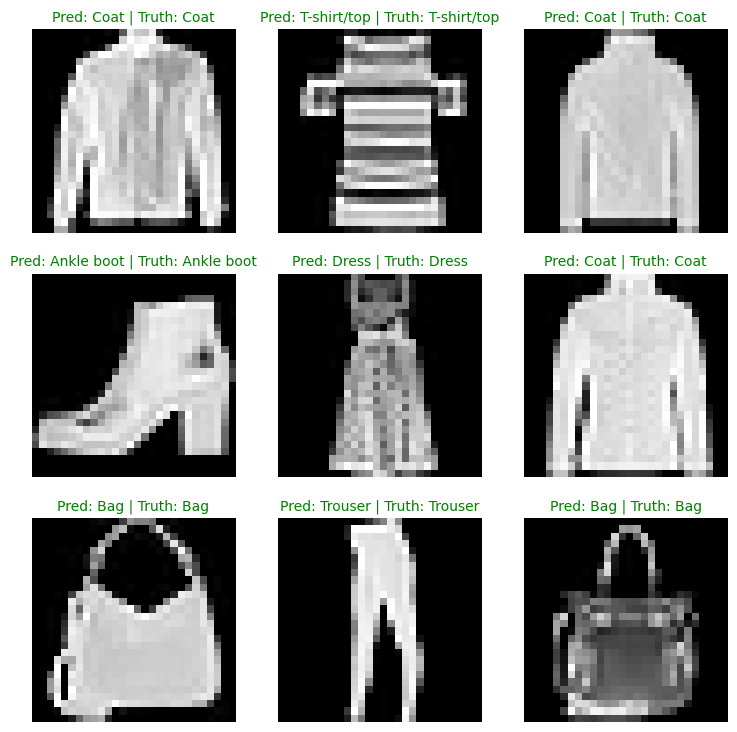

In [60]:
# Plot predictions

fig = plt.figure(figsize=(9,9))
rows, cols = 3,3
for i, sample in enumerate(test_sample):
    # Create subplot
    plt.subplot(rows, cols, i+1)
    
    # Plot target image
    plt.imshow(sample.squeeze(), cmap="gray")
    
    # Find the predictions in text form
    pred_label = class_names[pred_classes[i]]
    
    # Get the truth table in text form
    truth_table = class_names[test_labels[i]]
    
    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_table}"
    
    # Check for equality between pred and truth and choose color
    if pred_label == truth_table:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
        
    plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating yor classification model visually.

1. Make predictions with our trained model on the test dataset.
2. Make a confusion matrix `torchmetrics.ConfusionMatrix()`
3. plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [63]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making Predictions..."):
        # Send the data to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logits = model_2(X)
        # Turn predictions from logits -> pred prob -> labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        # Put prediction on cpu for evaluation
        y_preds.append(y_pred.cpu())

        
# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [65]:
len(y_pred_tensor)

10000

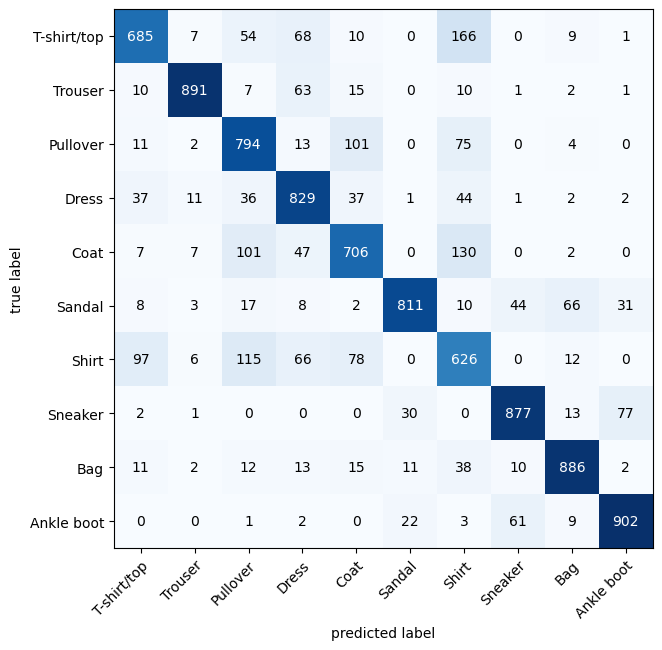

In [67]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

# 3. PLot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),   #matplotlib works with numpy
    class_names=class_names,
    figsize=(10,7)
)

In [68]:
confmat_tensor

tensor([[685,   7,  54,  68,  10,   0, 166,   0,   9,   1],
        [ 10, 891,   7,  63,  15,   0,  10,   1,   2,   1],
        [ 11,   2, 794,  13, 101,   0,  75,   0,   4,   0],
        [ 37,  11,  36, 829,  37,   1,  44,   1,   2,   2],
        [  7,   7, 101,  47, 706,   0, 130,   0,   2,   0],
        [  8,   3,  17,   8,   2, 811,  10,  44,  66,  31],
        [ 97,   6, 115,  66,  78,   0, 626,   0,  12,   0],
        [  2,   1,   0,   0,   0,  30,   0, 877,  13,  77],
        [ 11,   2,  12,  13,  15,  11,  38,  10, 886,   2],
        [  0,   0,   1,   2,   0,  22,   3,  61,   9, 902]])

## 11. Save and Load best performing model

In [70]:
from pathlib import Path

# 1. Creating model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "04_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Saving state dict into directory
print(f"Model save to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
          f=MODEL_SAVE_PATH)

Model save to: models\04_pytorch_computer_vision_model_2.pth


In [71]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Sen the model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [72]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.337265282869339,
 'model_acc': 88.02915335463258}

In [73]:
# Evaluate loaded model
torch.manual_seed(42)

load_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

load_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.337265282869339,
 'model_acc': 88.02915335463258}

In [74]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
             torch.tensor(load_model_2_results['model_loss']))

tensor(True)

___

## Exercises

https://www.learnpytorch.io/03_pytorch_computer_vision/#exercises